In [1]:
import subprocess
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore', category=DeprecationWarning)

topks = [2, 4, 6, 8, 10]
ppr_normalization = ['row', 'cosine_similarity']
data_file = ['data/cora_ml.npz', 'data/ms_academic.npz', 'data/pubmed.npz']
n_trials = 2

results_df = pd.DataFrame(columns=['topk', 'ppr_normalization', 'data_file', 'Accuracy'])

def run_experiment(topk, ppr_norm, dataset, saveto, fname):
    print(f"Running experiment with topk={topk}, ppr_normalization={ppr_norm}, data_file={dataset}")
    
    command = [
        "python", "main.py",
        f"--topk={topk}",
        f"--ppr_normalization={ppr_norm}",
        f"--data_file={dataset}"
    ]
    
    result = subprocess.run(command, capture_output=True, text=True, encoding='utf-8')
    
    output = result.stdout
    accuracy = None
    for line in output.splitlines()[-10:]:
        if "Testing accuracy" in line:
            try:
                accuracy = float(line.split(":")[1].strip())
            except ValueError:
                accuracy = None
            break
    
    return accuracy

for topk in topks:
    for ppr_norm in ppr_normalization:
        for dataset in data_file:
            accuracies = []
            for trial in range(n_trials):
                print(f"Trial {trial + 1}/{n_trials}")
                accuracy = run_experiment(topk, ppr_norm, dataset)
                if accuracy is not None:
                    accuracies.append(accuracy)
            
            if accuracies:
                avg_accuracy = np.mean(accuracies)
                std_accuracy = np.std(accuracies)
                # Append the average result to the DataFrame
                results_df = results_df.append({
                    'topk': topk,
                    'ppr_normalization': ppr_norm,
                    'data_file': dataset,
                    'Accuracy': avg_accuracy,
                    'Std': std_accuracy
                }, ignore_index=True)
                print(f"Average accuracy: {avg_accuracy:.4f} ± {std_accuracy:.4f}")
            else:
                print(f"Failed to obtain accuracy for topk={topk}, ppr_normalization={ppr_norm}, data_file={dataset}")

results_df.head()

results_df.to_csv("ppr_experiment_results_with_trials_sftmx.csv", index=False)

Trial 1/2
Running experiment with topk=2, ppr_normalization=row, data_file=data/cora_ml.npz
Trial 2/2
Running experiment with topk=2, ppr_normalization=row, data_file=data/cora_ml.npz
Average accuracy: 0.6796 ± 0.0015
Trial 1/2
Running experiment with topk=2, ppr_normalization=row, data_file=data/ms_academic.npz
Trial 2/2
Running experiment with topk=2, ppr_normalization=row, data_file=data/ms_academic.npz
Average accuracy: 0.9489 ± 0.0041
Trial 1/2
Running experiment with topk=2, ppr_normalization=row, data_file=data/pubmed.npz
Trial 2/2
Running experiment with topk=2, ppr_normalization=row, data_file=data/pubmed.npz
Average accuracy: 0.8407 ± 0.0035
Trial 1/2
Running experiment with topk=2, ppr_normalization=cosine_similarity, data_file=data/cora_ml.npz
Trial 2/2
Running experiment with topk=2, ppr_normalization=cosine_similarity, data_file=data/cora_ml.npz
Average accuracy: 0.4706 ± 0.0650
Trial 1/2
Running experiment with topk=2, ppr_normalization=cosine_similarity, data_file=data/

Using softmax to normalise outgoing edge weights for a node.

In [3]:
import matplotlib.pyplot as plt

def plot_data(results_df):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    datasets = [('cora_ml', 'Cora ML'), ('ms_academic', 'MS Academic'), ('pubmed', 'PubMed')]
    axes = [ax1, ax2, ax3]

    for (dataset_name, title), ax in zip(datasets, axes):
        dataset_data = results_df[results_df['data_file'] == f'data/{dataset_name}.npz']
        
        for norm in ppr_normalization:
            norm_data = dataset_data[dataset_data['ppr_normalization'] == norm]
            marker = 'o-' if norm == 'row' else 's-'
            ax.errorbar(norm_data['topk'], norm_data['Accuracy'], yerr=norm_data['Std'], 
                    fmt=marker, capsize=5, 
                    label=norm if not norm == 'row' else 'normal personalised pagerank')
        
        ax.set_title(f'{title} Dataset')
        ax.set_xlabel('Top K')
        ax.set_ylabel('Accuracy')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()


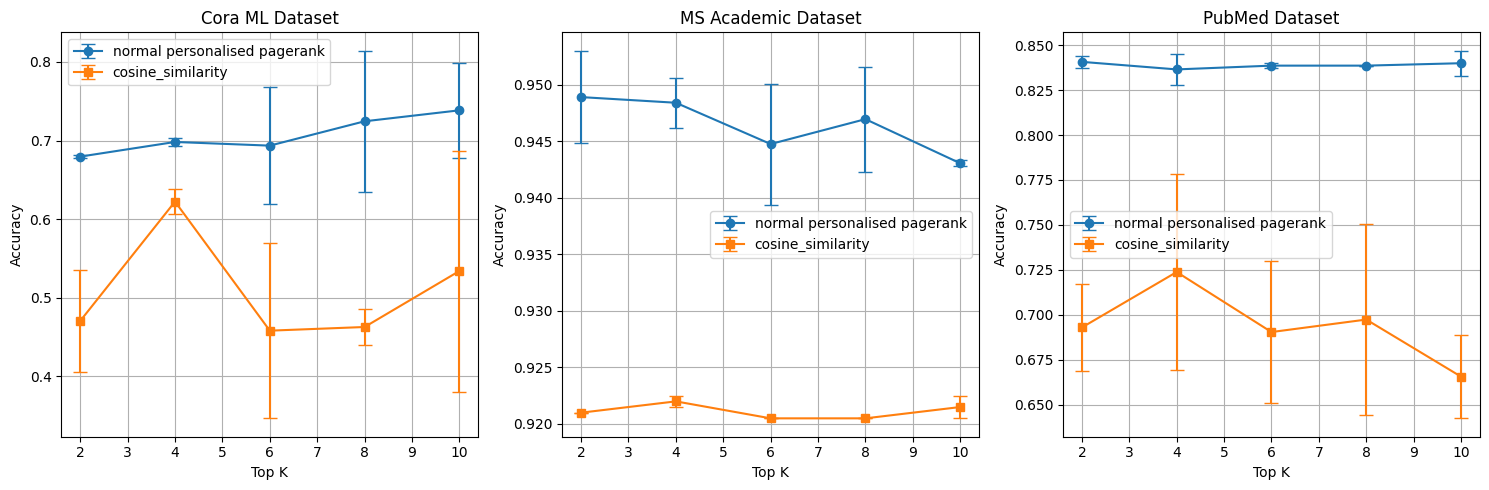

In [ ]:
plot_data(results_df)

In [9]:
import subprocess
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore', category=DeprecationWarning)

topks = [2, 4, 6, 8, 10]
ppr_normalization = ['row', 'cosine_similarity']
data_file = ['data/cora_ml.npz', 'data/ms_academic.npz', 'data/pubmed.npz']
n_trials = 3

res_dfval = pd.DataFrame(columns=['topk', 'ppr_normalization', 'data_file', 'Accuracy'])

def run_experiment(topk, ppr_norm, dataset):
    print(f"Running experiment with topk={topk}, ppr_normalization={ppr_norm}, data_file={dataset}")
    
    command = [
        "python", "main.py",
        f"--topk={topk}",
        f"--ppr_normalization={ppr_norm}",
        f"--data_file={dataset}",
        f"--dp_sgd=True"
    ]
    
    result = subprocess.run(command, capture_output=True, text=True, encoding='utf-8')
    
    output = result.stdout
    accuracy = None
    for line in output.splitlines()[-10:]:
        if "Testing accuracy" in line:
            try:
                accuracy = float(line.split(":")[1].strip())
            except ValueError:
                accuracy = None
            break
    
    return accuracy

for topk in topks:
    for ppr_norm in ppr_normalization:
        for dataset in data_file:
            accuracies = []
            for trial in range(n_trials):
                print(f"Trial {trial + 1}/{n_trials}")
                accuracy = run_experiment(topk, ppr_norm, dataset)
                if accuracy is not None:
                    accuracies.append(accuracy)
            
            if accuracies:
                avg_accuracy = np.mean(accuracies)
                std_accuracy = np.std(accuracies)
                # Append the average result to the DataFrame
                res_dfval = res_dfval.append({
                    'topk': topk,
                    'ppr_normalization': ppr_norm,
                    'data_file': dataset,
                    'Accuracy': avg_accuracy,
                    'Std': std_accuracy
                }, ignore_index=True)
                print(f"Average accuracy: {avg_accuracy:.4f} ± {std_accuracy:.4f}")
            else:
                print(f"Failed to obtain accuracy for topk={topk}, ppr_normalization={ppr_norm}, data_file={dataset}")

res_dfval.head()

res_dfval.to_csv("validation_pprresults.csv", index=False)

Trial 1/3
Running experiment with topk=2, ppr_normalization=row, data_file=data/cora_ml.npz
Trial 2/3
Running experiment with topk=2, ppr_normalization=row, data_file=data/cora_ml.npz
Trial 3/3
Running experiment with topk=2, ppr_normalization=row, data_file=data/cora_ml.npz
Average accuracy: 0.5975 ± 0.0834
Trial 1/3
Running experiment with topk=2, ppr_normalization=row, data_file=data/ms_academic.npz
Trial 2/3
Running experiment with topk=2, ppr_normalization=row, data_file=data/ms_academic.npz
Trial 3/3
Running experiment with topk=2, ppr_normalization=row, data_file=data/ms_academic.npz
Average accuracy: 0.9280 ± 0.0083
Trial 1/3
Running experiment with topk=2, ppr_normalization=row, data_file=data/pubmed.npz
Trial 2/3
Running experiment with topk=2, ppr_normalization=row, data_file=data/pubmed.npz
Trial 3/3
Running experiment with topk=2, ppr_normalization=row, data_file=data/pubmed.npz
Average accuracy: 0.8457 ± 0.0084
Trial 1/3
Running experiment with topk=2, ppr_normalization=c

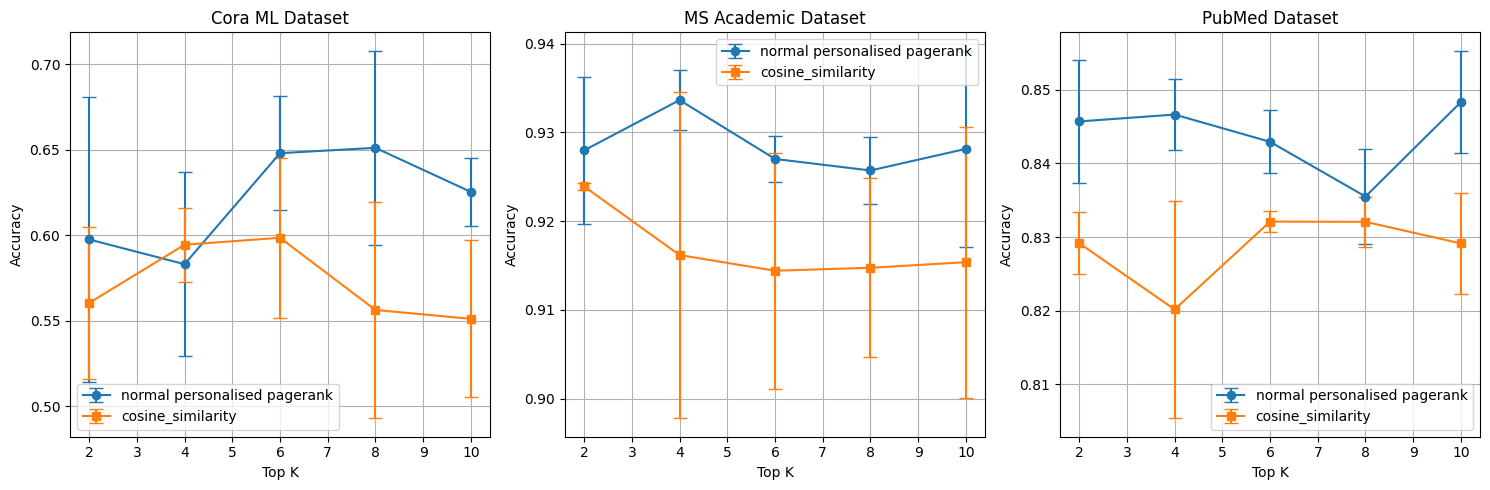

In [10]:
plot_data(res_dfval) #do the opposite, picking highly negatively correlated nodes. with DPSGD